# Preprocesamiento

In [ ]:
!pip install comet_ml

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="krnsqImdHJjs4Y1RdFTqfrtjd",
    project_name="aagrafos",
    workspace="facundolezama",
)


In [ ]:
import pandas as pd
import numpy as np
import scipy

El dataset se encuentra disponible en https://github.com/ffedee7/posifi_mnav/tree/master/data_analysis. El dataset disponible está anonimizado pero se puede deshacer con el código de ese repositorio.

In [ ]:
df = pd.read_csv('datos2.csv')

In [ ]:
print(df.head())
print(df.describe())
print(df.shape)

      location  ...  wifi-00:87:01:6f:b6:ae
0   location_7  ...                     NaN
1   location_3  ...                     NaN
2   location_8  ...                     NaN
3  location_10  ...                     NaN
4   location_3  ...                     NaN

[5 rows x 189 columns]
       wifi-c0:7b:bc:36:af:80  ...  wifi-00:87:01:6f:b6:ae
count             8278.000000  ...                     7.0
mean               -83.642426  ...                   -89.0
std                  6.342463  ...                     0.0
min                -96.000000  ...                   -89.0
25%                -89.000000  ...                   -89.0
50%                -84.000000  ...                   -89.0
75%                -79.000000  ...                   -89.0
max                -57.000000  ...                   -89.0

[8 rows x 188 columns]
(10469, 189)


In [ ]:
APs_MAC_2_4 = ['wifi-dc:a5:f4:43:85:c0',
'wifi-dc:a5:f4:43:27:e0',
'wifi-f8:4f:57:ab:da:00',
'wifi-5c:a4:8a:4c:05:c0',
'wifi-1c:1d:86:ce:ef:b0',
'wifi-dc:a5:f4:43:79:20',
'wifi-c0:7b:bc:36:9e:10',
'wifi-1c:1d:86:9f:99:20',
'wifi-c0:7b:bc:36:af:40',
'wifi-c0:7b:bc:36:af:80',
'wifi-1c:1d:86:b6:ac:80',
'wifi-dc:a5:f4:43:72:e0',
'wifi-f8:4f:57:ab:d8:60',
'wifi-dc:a5:f4:43:72:90',
'wifi-f8:4f:57:ab:ce:20']

In [ ]:
APs_MAC_5 = ['wifi-dc:a5:f4:45:85:b0',
'wifi-dc:a5:f4:45:27:e0',
'wifi-f8:4f:57:ad:d9:60',
'wifi-5c:a4:8a:4e:05:30',
'wifi-1c:1d:86:d0:ef:00',
'wifi-dc:a5:f4:45:79:10',
'wifi-c0:7b:bc:38:9e:00',
'wifi-1c:1d:86:a1:99:00',
'wifi-c0:7b:bc:38:af:30',
'wifi-c0:7b:bc:38:af:70',
'wifi-1c:1d:86:b8:ac:80',
'wifi-dc:a5:f4:45:72:d0',
'wifi-f8:4f:57:ad:d7:c0',
'wifi-dc:a5:f4:45:72:80',
'wifi-f8:4f:57:ad:cd:80']


In [ ]:
data = df[['location'] + APs_MAC_2_4]

In [ ]:
data.head()

,location,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20
0,location_7,-76.0,NaN,NaN,-91.0,-80.0,-74.0,-79.0,-78.0,-77.0,-84.0,-73.0,-68.0,-69.0,-73.0,-92.0
1,location_3,-81.0,-93.0,-88.0,-87.0,-94.0,-87.0,-85.0,-79.0,-79.0,-84.0,-71.0,-75.0,-66.0,-71.0,NaN
2,location_8,-87.0,-90.0,NaN,-83.0,NaN,-79.0,-93.0,-83.0,-80.0,-91.0,-73.0,-78.0,-69.0,-79.0,NaN
3,location_10,-84.0,-93.0,-88.0,-93.0,NaN,-89.0,-93.0,-87.0,-85.0,NaN,-92.0,-91.0,-70.0,-86.0,NaN
4,location_3,-78.0,-94.0,-90.0,-86.0,NaN,-88.0,-86.0,-79.0,-79.0,-85.0,-66.0,-80.0,-67.0,-72.0,NaN


In [ ]:
df_data = data.fillna(0)

In [ ]:
df_data.describe()

,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,-74.736938,-63.460311,-62.333938,-63.592034,-61.569586,-67.130480,-72.341102,-74.900277,-73.787850,-66.137358,-62.013086,-69.307575,-69.288853,-68.658898,-31.947273
std,11.281219,34.334320,33.829204,35.193247,38.126059,24.422821,27.705782,17.730980,12.923912,34.491401,29.067190,25.531147,9.274414,21.175376,40.217717
min,-94.000000,-99.000000,-96.000000,-95.000000,-97.000000,-94.000000,-96.000000,-95.000000,-95.000000,-96.000000,-96.000000,-98.000000,-94.000000,-96.000000,-96.000000
25%,-81.000000,-89.000000,-86.000000,-87.000000,-89.000000,-81.000000,-88.000000,-84.000000,-81.000000,-87.000000,-79.000000,-84.000000,-75.000000,-81.000000,-77.000000
50%,-77.000000,-80.000000,-79.000000,-82.000000,-82.000000,-75.000000,-81.000000,-78.000000,-75.000000,-82.000000,-71.000000,-76.000000,-69.000000,-74.000000,0.000000
75%,-71.000000,-57.000000,-53.000000,-57.000000,0.000000,-65.000000,-74.000000,-72.000000,-69.000000,-73.000000,-63.000000,-68.000000,-64.000000,-65.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_data.iloc[:,1:] = 100 + df_data.iloc[:,1:]

In [ ]:
values = df_data.iloc[:,1:]
values[values==100] = 0 
df_data.iloc[:,1:] = values

In [ ]:
df_data

,location,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20
0,location_7,24.0,0.0,0.0,9.0,20.0,26.0,21.0,22.0,23.0,16.0,27.0,32.0,31.0,27.0,8.0
1,location_3,19.0,7.0,12.0,13.0,6.0,13.0,15.0,21.0,21.0,16.0,29.0,25.0,34.0,29.0,0.0
2,location_8,13.0,10.0,0.0,17.0,0.0,21.0,7.0,17.0,20.0,9.0,27.0,22.0,31.0,21.0,0.0
3,location_10,16.0,7.0,12.0,7.0,0.0,11.0,7.0,13.0,15.0,0.0,8.0,9.0,30.0,14.0,0.0
4,location_3,22.0,6.0,10.0,14.0,0.0,12.0,14.0,21.0,21.0,15.0,34.0,20.0,33.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,location_7,23.0,17.0,17.0,15.0,21.0,30.0,23.0,25.0,28.0,19.0,28.0,58.0,42.0,32.0,0.0
10465,location_8,14.0,6.0,15.0,6.0,13.0,16.0,14.0,17.0,16.0,17.0,26.0,37.0,27.0,11.0,6.0
10466,location_2,36.0,46.0,33.0,0.0,0.0,35.0,13.0,7.0,8.0,16.0,0.0,8.0,23.0,33.0,39.0
10467,location_8,19.0,0.0,0.0,23.0,8.0,20.0,10.0,17.0,28.0,10.0,35.0,13.0,42.0,26.0,0.0


In [ ]:
col_name = df_data.columns
columns = {}

for i, name_or in enumerate(col_name):
  if i > 0:
    columns[name_or] = 'AP' + str(i)

df_data = df_data.rename(columns = columns, inplace = False)

In [ ]:
df_data

,location,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,AP10,AP11,AP12,AP13,AP14,AP15
0,location_7,24.0,0.0,0.0,9.0,20.0,26.0,21.0,22.0,23.0,16.0,27.0,32.0,31.0,27.0,8.0
1,location_3,19.0,7.0,12.0,13.0,6.0,13.0,15.0,21.0,21.0,16.0,29.0,25.0,34.0,29.0,0.0
2,location_8,13.0,10.0,0.0,17.0,0.0,21.0,7.0,17.0,20.0,9.0,27.0,22.0,31.0,21.0,0.0
3,location_10,16.0,7.0,12.0,7.0,0.0,11.0,7.0,13.0,15.0,0.0,8.0,9.0,30.0,14.0,0.0
4,location_3,22.0,6.0,10.0,14.0,0.0,12.0,14.0,21.0,21.0,15.0,34.0,20.0,33.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,location_7,23.0,17.0,17.0,15.0,21.0,30.0,23.0,25.0,28.0,19.0,28.0,58.0,42.0,32.0,0.0
10465,location_8,14.0,6.0,15.0,6.0,13.0,16.0,14.0,17.0,16.0,17.0,26.0,37.0,27.0,11.0,6.0
10466,location_2,36.0,46.0,33.0,0.0,0.0,35.0,13.0,7.0,8.0,16.0,0.0,8.0,23.0,33.0,39.0
10467,location_8,19.0,0.0,0.0,23.0,8.0,20.0,10.0,17.0,28.0,10.0,35.0,13.0,42.0,26.0,0.0


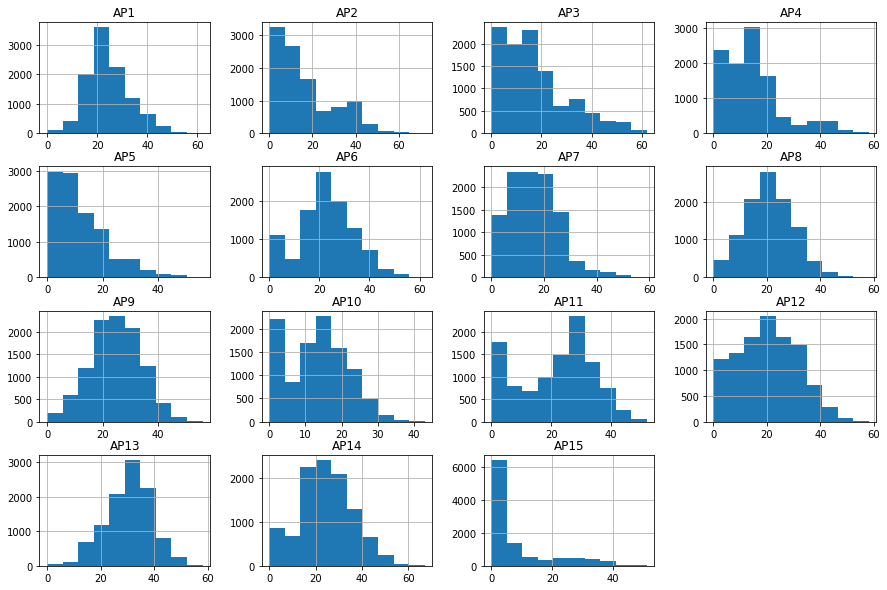

In [ ]:
from matplotlib import pyplot as plt
df_data.hist(figsize=[15,10])
plt.show()

In [ ]:
df_data.describe()

,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,AP10,AP11,AP12,AP13,AP14,AP15
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,24.221893,15.840481,16.766262,14.037157,11.503295,22.476932,15.823956,20.849078,24.492788,12.934187,21.309103,20.147005,30.338619,24.301270,7.473875
std,8.640959,13.894554,13.855279,11.396318,10.262876,11.504953,9.933244,9.198546,9.069914,8.722967,12.883453,11.548641,8.455963,11.666039,11.608307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,8.000000,7.000000,0.000000,16.000000,9.000000,14.000000,19.000000,7.000000,11.000000,12.000000,25.000000,17.000000,0.000000
50%,23.000000,13.000000,14.000000,13.000000,10.000000,23.000000,15.000000,21.000000,25.000000,13.000000,24.000000,21.000000,31.000000,24.000000,0.000000
75%,29.000000,24.000000,23.000000,19.000000,17.000000,29.000000,22.000000,27.000000,31.000000,19.000000,31.000000,28.000000,36.000000,32.000000,11.000000
max,62.000000,72.000000,62.000000,58.000000,56.000000,62.000000,59.000000,58.000000,56.000000,43.000000,52.000000,58.000000,58.000000,67.000000,51.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int)
y = enc.fit_transform(df_data['location'].values.reshape(-1,1))
X = df_data.iloc[:,1:].values

In [ ]:
y

array([[13],
       [ 9],
       [14],
       ...,
       [ 8],
       [14],
       [11]])

In [ ]:
X

array([[24.,  0.,  0., ..., 31., 27.,  8.],
       [19.,  7., 12., ..., 34., 29.,  0.],
       [13., 10.,  0., ..., 31., 21.,  0.],
       ...,
       [36., 46., 33., ..., 23., 33., 39.],
       [19.,  0.,  0., ..., 42., 26.,  0.],
       [25., 20., 15., ..., 35., 22.,  7.]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_G = X_train.copy()


# Grafo

In [ ]:
df_data_train = pd.DataFrame(X_G, columns=df_data.columns[1:])
df_G = pd.DataFrame(columns = ['from', 'to', 'weight'])

th = 10 

for i in range(1,16):
  max_val = df_data_train['AP'+str(i)].max()
  df_aux_i = df_data_train[df_data_train['AP'+str(i)]  > (max_val - th)]
  df_aux_i = df_aux_i.drop('AP'+str(i), axis=1) 
  df_aux_i.head()

  for k, v in df_aux_i.mean().items():
    df_G = df_G.append({'from':'AP'+str(i), 'to': k, 'weight': v}, ignore_index=True)

In [ ]:
df_data_train

,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,AP10,AP11,AP12,AP13,AP14,AP15
0,20.0,0.0,0.0,13.0,12.0,6.0,8.0,15.0,13.0,14.0,30.0,23.0,26.0,19.0,0.0
1,23.0,0.0,0.0,56.0,29.0,18.0,9.0,17.0,34.0,0.0,15.0,7.0,24.0,7.0,0.0
2,29.0,26.0,12.0,16.0,33.0,29.0,32.0,32.0,22.0,13.0,0.0,18.0,28.0,22.0,0.0
3,24.0,10.0,17.0,10.0,21.0,30.0,18.0,23.0,20.0,22.0,34.0,35.0,31.0,21.0,0.0
4,19.0,0.0,17.0,7.0,19.0,21.0,17.0,27.0,16.0,20.0,24.0,44.0,34.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,18.0,9.0,0.0,11.0,11.0,27.0,6.0,16.0,19.0,10.0,27.0,28.0,32.0,20.0,0.0
8371,36.0,25.0,28.0,0.0,0.0,39.0,27.0,23.0,25.0,19.0,22.0,21.0,34.0,22.0,14.0
8372,20.0,0.0,0.0,8.0,6.0,20.0,0.0,19.0,29.0,23.0,26.0,24.0,39.0,35.0,0.0
8373,34.0,15.0,16.0,25.0,15.0,30.0,24.0,32.0,32.0,18.0,26.0,12.0,29.0,17.0,0.0


In [ ]:
df_G

,from,to,weight
0,AP1,AP2,38.947368
1,AP1,AP3,44.631579
2,AP1,AP4,0.947368
3,AP1,AP5,1.263158
4,AP1,AP6,34.368421
...,...,...,...
205,AP15,AP10,8.166667
206,AP15,AP11,1.600000
207,AP15,AP12,3.616667
208,AP15,AP13,23.850000


In [ ]:
#df_G = df_G[df_G['weight'] > 30]

In [ ]:
df_G.shape

(210, 3)

In [ ]:
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist(df_G, source='from', target='to', edge_attr='weight')  # create_using=nx.DiGraph

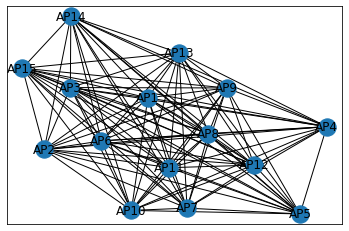

In [ ]:
nx.draw_networkx(G)
plt.show()

In [ ]:
nx.to_numpy_array(G)

array([[ 0.        , 29.27777778, 28.63265306, 21.74137931, 15.02272727,
        30.25      , 27.5       , 30.86111111, 30.43181818, 24.76595745,
        24.51282051, 20.7037037 , 28.56818182, 41.83333333, 30.96666667],
       [29.27777778,  0.        , 31.92517007,  2.60344828,  7.93181818,
        53.875     , 28.475     , 20.22222222, 14.47727273, 22.91489362,
         9.15897436, 10.51851852, 14.76515152, 34.33333333, 47.56666667],
       [28.63265306, 31.92517007,  0.        ,  1.39655172,  3.63636364,
        34.5625    , 12.8       , 19.52777778, 17.27272727, 16.4893617 ,
        13.63589744, 10.2962963 , 17.25757576, 45.16666667, 33.73333333],
       [21.74137931,  2.60344828,  1.39655172,  0.        , 33.11363636,
         0.4375    , 14.775     , 21.05555556, 25.11363636, 15.36170213,
        18.29230769,  7.51851852, 12.96969697,  0.        ,  0.        ],
       [15.02272727,  7.93181818,  3.63636364, 33.11363636,  0.        ,
         6.8125    , 19.2       , 22.58333333, 

In [ ]:
W = nx.to_numpy_array(G)
# por último le saco la diagonal y la normalizo por su vector propio más grande
np.fill_diagonal(W,0)
(w,v) = scipy.sparse.linalg.eigs(W, k=1,which='LM')
W = W/np.abs(w[0])

# Armado dataset

In [ ]:
data = df[['location'] + APs_MAC_2_4 + APs_MAC_5]

In [ ]:
data.head()

,location,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20,wifi-dc:a5:f4:45:85:b0,wifi-dc:a5:f4:45:27:e0,wifi-f8:4f:57:ad:d9:60,wifi-5c:a4:8a:4e:05:30,wifi-1c:1d:86:d0:ef:00,wifi-dc:a5:f4:45:79:10,wifi-c0:7b:bc:38:9e:00,wifi-1c:1d:86:a1:99:00,wifi-c0:7b:bc:38:af:30,wifi-c0:7b:bc:38:af:70,wifi-1c:1d:86:b8:ac:80,wifi-dc:a5:f4:45:72:d0,wifi-f8:4f:57:ad:d7:c0,wifi-dc:a5:f4:45:72:80,wifi-f8:4f:57:ad:cd:80
0,location_7,-76.0,NaN,NaN,-91.0,-80.0,-74.0,-79.0,-78.0,-77.0,-84.0,-73.0,-68.0,-69.0,-73.0,-92.0,NaN,NaN,NaN,NaN,-90.0,NaN,-84.0,-78.0,-89.0,-83.0,-71.0,-63.0,NaN,NaN,NaN
1,location_3,-81.0,-93.0,-88.0,-87.0,-94.0,-87.0,-85.0,-79.0,-79.0,-84.0,-71.0,-75.0,-66.0,-71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.0,-80.0,-95.0,-88.0,-72.0,-92.0,NaN,NaN,NaN
2,location_8,-87.0,-90.0,NaN,-83.0,NaN,-79.0,-93.0,-83.0,-80.0,-91.0,-73.0,-78.0,-69.0,-79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-93.0,-90.0,-82.0,-92.0,NaN,NaN,NaN
3,location_10,-84.0,-93.0,-88.0,-93.0,NaN,-89.0,-93.0,-87.0,-85.0,NaN,-92.0,-91.0,-70.0,-86.0,NaN,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,-91.0,-94.0,NaN,-95.0,NaN,NaN,NaN,NaN
4,location_3,-78.0,-94.0,-90.0,-86.0,NaN,-88.0,-86.0,-79.0,-79.0,-85.0,-66.0,-80.0,-67.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,-74.0,-84.0,-85.0,-66.0,-89.0,NaN,NaN,NaN


In [ ]:
df_data = data.fillna(0)

In [ ]:
df_data.describe()

,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20,wifi-dc:a5:f4:45:85:b0,wifi-dc:a5:f4:45:27:e0,wifi-f8:4f:57:ad:d9:60,wifi-5c:a4:8a:4e:05:30,wifi-1c:1d:86:d0:ef:00,wifi-dc:a5:f4:45:79:10,wifi-c0:7b:bc:38:9e:00,wifi-1c:1d:86:a1:99:00,wifi-c0:7b:bc:38:af:30,wifi-c0:7b:bc:38:af:70,wifi-1c:1d:86:b8:ac:80,wifi-dc:a5:f4:45:72:d0,wifi-f8:4f:57:ad:d7:c0,wifi-dc:a5:f4:45:72:80,wifi-f8:4f:57:ad:cd:80
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,-74.736938,-63.460311,-62.333938,-63.592034,-61.569586,-67.130480,-72.341102,-74.900277,-73.787850,-66.137358,-62.013086,-69.307575,-69.288853,-68.658898,-31.947273,-33.141370,-21.668450,-26.419715,-24.892635,-16.226669,-32.545706,-61.617155,-70.844493,-74.635973,-50.520871,-58.866272,-50.444837,-2.484287,-25.082911,-15.821664
std,11.281219,34.334320,33.829204,35.193247,38.126059,24.422821,27.705782,17.730980,12.923912,34.491401,29.067190,25.531147,9.274414,21.175376,40.217717,43.328685,37.514939,38.443222,37.845597,33.683047,41.231079,37.186118,23.097480,29.951613,43.556323,31.616944,43.229581,15.045672,40.416775,33.331730
min,-94.000000,-99.000000,-96.000000,-95.000000,-97.000000,-94.000000,-96.000000,-95.000000,-95.000000,-96.000000,-96.000000,-98.000000,-94.000000,-96.000000,-96.000000,-98.000000,-98.000000,-97.000000,-96.000000,-99.000000,-96.000000,-96.000000,-96.000000,-99.000000,-99.000000,-96.000000,-97.000000,-97.000000,-99.000000,-97.000000
25%,-81.000000,-89.000000,-86.000000,-87.000000,-89.000000,-81.000000,-88.000000,-84.000000,-81.000000,-87.000000,-79.000000,-84.000000,-75.000000,-81.000000,-77.000000,-88.000000,-55.000000,-74.000000,-64.000000,0.000000,-82.000000,-89.000000,-84.000000,-91.000000,-90.000000,-81.000000,-90.000000,0.000000,-82.000000,0.000000
50%,-77.000000,-80.000000,-79.000000,-82.000000,-82.000000,-75.000000,-81.000000,-78.000000,-75.000000,-82.000000,-71.000000,-76.000000,-69.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,-77.000000,-86.000000,-82.000000,-70.000000,-78.000000,0.000000,0.000000,0.000000
75%,-71.000000,-57.000000,-53.000000,-57.000000,0.000000,-65.000000,-74.000000,-72.000000,-69.000000,-73.000000,-63.000000,-68.000000,-64.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-67.000000,-78.000000,0.000000,-56.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_data.iloc[:,1:] = 100 + df_data.iloc[:,1:]

In [ ]:
values = df_data.iloc[:,1:]
values[values==100] = 0 
df_data.iloc[:,1:] = values

In [ ]:
df_data

,location,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20,wifi-dc:a5:f4:45:85:b0,wifi-dc:a5:f4:45:27:e0,wifi-f8:4f:57:ad:d9:60,wifi-5c:a4:8a:4e:05:30,wifi-1c:1d:86:d0:ef:00,wifi-dc:a5:f4:45:79:10,wifi-c0:7b:bc:38:9e:00,wifi-1c:1d:86:a1:99:00,wifi-c0:7b:bc:38:af:30,wifi-c0:7b:bc:38:af:70,wifi-1c:1d:86:b8:ac:80,wifi-dc:a5:f4:45:72:d0,wifi-f8:4f:57:ad:d7:c0,wifi-dc:a5:f4:45:72:80,wifi-f8:4f:57:ad:cd:80
0,location_7,24.0,0.0,0.0,9.0,20.0,26.0,21.0,22.0,23.0,16.0,27.0,32.0,31.0,27.0,8.0,0.0,0.0,0.0,0.0,10.0,0.0,16.0,22.0,11.0,17.0,29.0,37.0,0.0,0.0,0.0
1,location_3,19.0,7.0,12.0,13.0,6.0,13.0,15.0,21.0,21.0,16.0,29.0,25.0,34.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,20.0,5.0,12.0,28.0,8.0,0.0,0.0,0.0
2,location_8,13.0,10.0,0.0,17.0,0.0,21.0,7.0,17.0,20.0,9.0,27.0,22.0,31.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,10.0,18.0,8.0,0.0,0.0,0.0
3,location_10,16.0,7.0,12.0,7.0,0.0,11.0,7.0,13.0,15.0,0.0,8.0,9.0,30.0,14.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,9.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0
4,location_3,22.0,6.0,10.0,14.0,0.0,12.0,14.0,21.0,21.0,15.0,34.0,20.0,33.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,26.0,16.0,15.0,34.0,11.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,location_7,23.0,17.0,17.0,15.0,21.0,30.0,23.0,25.0,28.0,19.0,28.0,58.0,42.0,32.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,22.0,20.0,15.0,8.0,37.0,33.0,0.0,0.0,0.0
10465,location_8,14.0,6.0,15.0,6.0,13.0,16.0,14.0,17.0,16.0,17.0,26.0,37.0,27.0,11.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,19.0,8.0,13.0,24.0,22.0,0.0,0.0,0.0
10466,location_2,36.0,46.0,33.0,0.0,0.0,35.0,13.0,7.0,8.0,16.0,0.0,8.0,23.0,33.0,39.0,13.0,18.0,19.0,0.0,0.0,19.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,6.0,31.0
10467,location_8,19.0,0.0,0.0,23.0,8.0,20.0,10.0,17.0,28.0,10.0,35.0,13.0,42.0,26.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,24.0,16.0,0.0,34.0,7.0,0.0,0.0,0.0


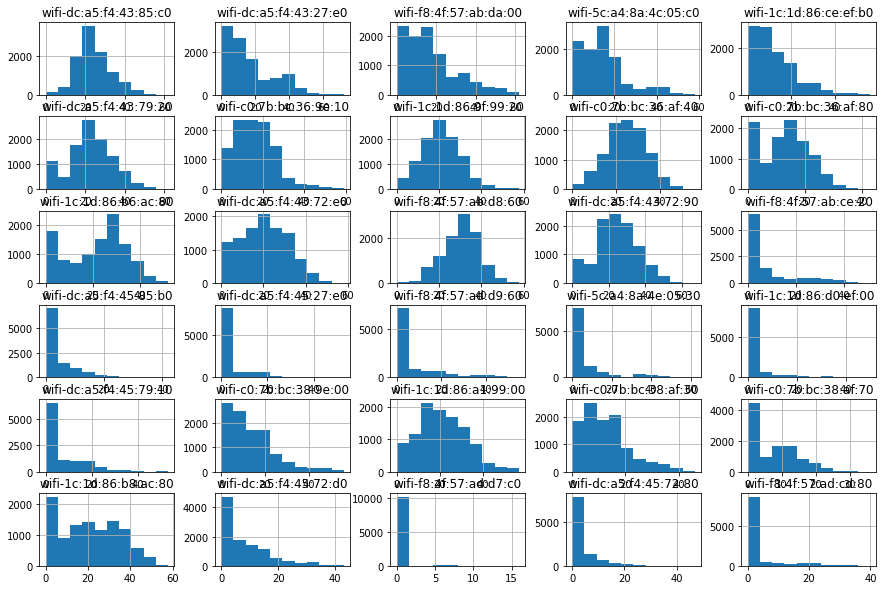

In [ ]:
from matplotlib import pyplot as plt
df_data.hist(figsize=[15,10])
plt.show()

In [ ]:
df_data.describe()

,wifi-dc:a5:f4:43:85:c0,wifi-dc:a5:f4:43:27:e0,wifi-f8:4f:57:ab:da:00,wifi-5c:a4:8a:4c:05:c0,wifi-1c:1d:86:ce:ef:b0,wifi-dc:a5:f4:43:79:20,wifi-c0:7b:bc:36:9e:10,wifi-1c:1d:86:9f:99:20,wifi-c0:7b:bc:36:af:40,wifi-c0:7b:bc:36:af:80,wifi-1c:1d:86:b6:ac:80,wifi-dc:a5:f4:43:72:e0,wifi-f8:4f:57:ab:d8:60,wifi-dc:a5:f4:43:72:90,wifi-f8:4f:57:ab:ce:20,wifi-dc:a5:f4:45:85:b0,wifi-dc:a5:f4:45:27:e0,wifi-f8:4f:57:ad:d9:60,wifi-5c:a4:8a:4e:05:30,wifi-1c:1d:86:d0:ef:00,wifi-dc:a5:f4:45:79:10,wifi-c0:7b:bc:38:9e:00,wifi-1c:1d:86:a1:99:00,wifi-c0:7b:bc:38:af:30,wifi-c0:7b:bc:38:af:70,wifi-1c:1d:86:b8:ac:80,wifi-dc:a5:f4:45:72:d0,wifi-f8:4f:57:ad:d7:c0,wifi-dc:a5:f4:45:72:80,wifi-f8:4f:57:ad:cd:80
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,24.221893,15.840481,16.766262,14.037157,11.503295,22.476932,15.823956,20.849078,24.492788,12.934187,21.309103,20.147005,30.338619,24.301270,7.473875,3.977744,3.625275,6.391441,6.246919,2.886904,6.206801,12.687936,21.064954,12.258668,7.020441,20.539593,7.698252,0.171172,2.866272,2.718789
std,8.640959,13.894554,13.855279,11.396318,10.262876,11.504953,9.933244,9.198546,9.069914,8.722967,12.883453,11.548641,8.455963,11.666039,11.608307,6.585218,7.700876,11.492442,12.174327,7.445715,9.308912,11.200689,11.432896,8.918749,7.071471,14.500032,8.909867,1.087026,5.712769,6.599088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,8.000000,7.000000,0.000000,16.000000,9.000000,14.000000,19.000000,7.000000,11.000000,12.000000,25.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,6.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,13.000000,14.000000,13.000000,10.000000,23.000000,15.000000,21.000000,25.000000,13.000000,24.000000,21.000000,31.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,20.000000,11.000000,7.000000,21.000000,6.000000,0.000000,0.000000,0.000000
75%,29.000000,24.000000,23.000000,19.000000,17.000000,29.000000,22.000000,27.000000,31.000000,19.000000,31.000000,28.000000,36.000000,32.000000,11.000000,7.000000,3.000000,10.000000,8.000000,0.000000,12.000000,19.000000,29.000000,17.000000,12.000000,32.000000,12.000000,0.000000,4.000000,0.000000
max,62.000000,72.000000,62.000000,58.000000,56.000000,62.000000,59.000000,58.000000,56.000000,43.000000,52.000000,58.000000,58.000000,67.000000,51.000000,42.000000,53.000000,55.000000,62.000000,50.000000,53.000000,56.000000,57.000000,46.000000,36.000000,58.000000,43.000000,16.000000,47.000000,40.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int)
y = enc.fit_transform(df_data['location'].values.reshape(-1,1))
X = df_data.iloc[:,1:].values

In [ ]:
print(X)
print(y)

[[24.  0.  0. ...  0.  0.  0.]
 [19.  7. 12. ...  0.  0.  0.]
 [13. 10.  0. ...  0.  0.  0.]
 ...
 [36. 46. 33. ...  0.  6. 31.]
 [19.  0.  0. ...  0.  0.  0.]
 [25. 20. 15. ...  0.  0.  0.]]
[[13]
 [ 9]
 [14]
 ...
 [ 8]
 [14]
 [11]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print(np.std(X_train, axis=0))
#print(np.std(X_val, axis=0))
print(np.std(X_test, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.99550814 1.00178426 0.99961979 1.02052814 1.0449872  1.00109413
 0.99556577 0.98788676 0.99013131 1.01963384 0.982186   1.00807279
 1.01236391 1.02737832 0.98527859 1.02470813 0.9728581  1.01687228
 1.06817457 1.04865791 0.99896701 0.99558194 0.98562882 0.97216669
 1.02056515 0.98030069 1.00999329 0.83123578 0.99744725 0.98094011]


# Entrenamiento - Validación Simple

In [ ]:
!git clone https://github.com/alelab-upenn/graph-neural-networks
import sys
sys.path.append('/content/graph-neural-networks/')
#necesita hdf5storage ...
!pip install hdf5storage

import alegnn.modules.architectures as architectures
import alegnn.utils.graphML as graphML
# no sé porqué le cambian los parámetros por defecto a pyplot... por lo menos le saco el latex que en colab no funciona por defecto.
plt.rcParams.update({"text.usetex": False})

import torch

Cloning into 'graph-neural-networks'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 156 (delta 40), reused 48 (delta 19), pack-reused 74
Receiving objects: 100% (156/156), 47.47 MiB | 46.03 MiB/s, done.
Resolving deltas: 100% (68/68), done.
     |████████████████████████████████| 61kB 3.3MB/s 


In [ ]:
x_training_data = np.reshape(X_train,(X_train.shape[0],2,15))
#x_validation_data = np.reshape(X_val,(X_val.shape[0],2,15))
x_test_data = np.reshape(X_test,(X_test.shape[0],2,15))
y_training_data = np.reshape(y_train,(y_train.shape[0],1,y_train.shape[1]))
#y_validation_data = np.reshape(y_val,(y_val.shape[0],1,y_val.shape[1]))
y_test_data = np.reshape(y_test,(y_test.shape[0],1,y_test.shape[1]))


train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
#val_data = torch.utils.data.TensorDataset(torch.from_numpy(x_validation_data).float(), torch.from_numpy(y_validation_data).float())
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test_data).float(), torch.from_numpy(y_test_data).float())

In [ ]:
from sklearn.metrics import accuracy_score
loss = torch.nn.CrossEntropyLoss()

def train_model(model, train_data, test_data, batch_size=32, n_epochs=100, epsilon=0.005, weight_decay=1e-2):
    
    optimizer = torch.optim.Adam(model.parameters(), lr=epsilon, weight_decay=weight_decay)
    # scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
    # Voy a mirar el loss en test en todo el conjunto de testing. Igual es bastante chico.
    test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)
    
    train_loss = []
    test_loss = []
    for epoch in range(n_epochs):
        for x_batch, y_batch in train_loader:
          if y_batch.shape[0] == batch_size:
            model.zero_grad()
            y_hat = model(x_batch)
            loss_result = loss(y_hat, y_batch.reshape(batch_size).type(torch.long))
            loss_result.backward()
            optimizer.step()
            # optimizer.zero_grad()
            train_loss.append(loss_result.item())
          else:
            break

        
        # scheduler.step()
        
        # Después de cada epoch miramos el test loss
        for x_batch, y_batch in test_loader:
            y_hattest = model(x_batch)
            test_loss.append(loss(y_hattest,y_batch.reshape(y_batch.shape[0]).type(torch.long)).item())

            #m = torch.nn.Softmax(dim=1)
            #output = m(y_hattest)

            #print(y_batch.shape)
            #print(y_batch.reshape(y_batch.shape[0]).shape)
            #print(y_hattest.shape)
            #print(np.array(torch.argmax(output, axis=1)).shape)
            #print(accuracy_score(y_batch.reshape(y_batch.shape[0]), np.array(torch.argmax(output, axis=1))))
            #print()
        
    return (model, train_loss, test_loss, y_hattest)


def plot_losses(model_name, train_loss, test_loss):
    plt.figure(figsize=[30,5])
    plt.semilogy(train_loss)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title(model_name+' - Train Loss')
    plt.grid()
    plt.show()
    plt.figure(figsize=[30,5])
    plt.plot(test_loss)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title(model_name+' - Test Loss')
    plt.grid()
    plt.show()

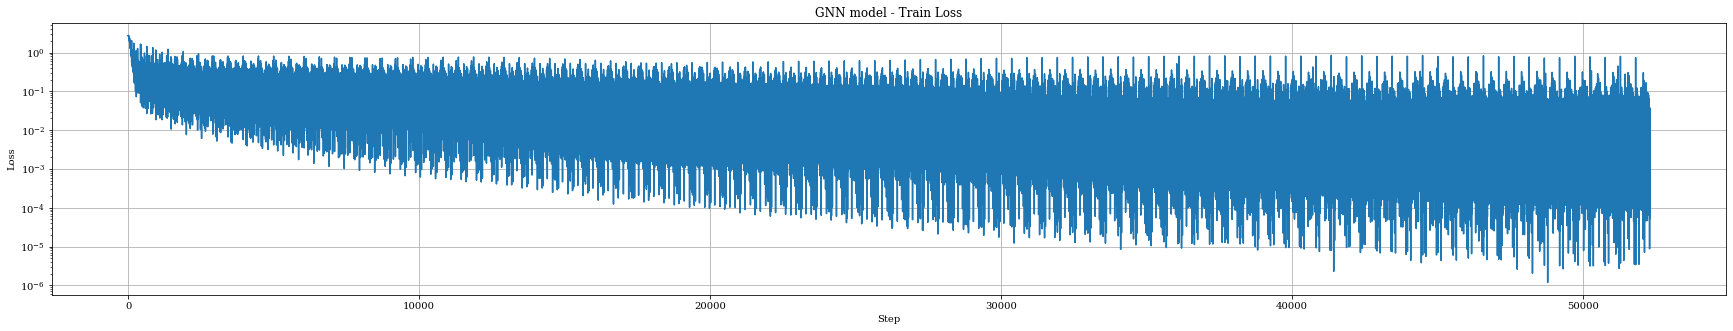

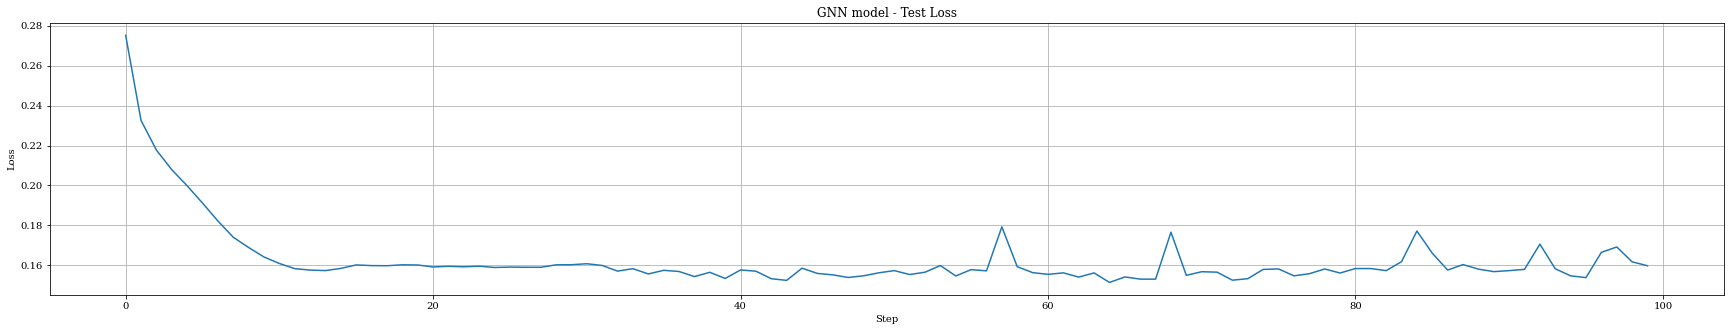

In [ ]:
# Just four architecture one- and two-layered Selection and Local GNN. The main
# difference is that the Local GNN is entirely local (i.e. the output is given
# by a linear combination of the features at a single node, instead of a final
# MLP layer combining the features at all nodes).

gnn_model = architectures.SelectionGNN(dimNodeSignals=[2, 20, 20], nFilterTaps=[3,3], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[15, 15], poolingFunction=graphML.NoPool, poolingSize=[15, 15], dimLayersMLP=[16], GSO=torch.from_numpy(W).float())
#gnn_model = architectures.SelectionGNN(dimNodeSignals=[1], nFilterTaps=[], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[], poolingFunction=graphML.NoPool, poolingSize=[], dimLayersMLP=[30, 16], GSO=torch.from_numpy(W).float())

#gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[5, 5], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[10, 10], poolingFunction=graphML.MaxPoolLocal, poolingSize=[2, 3], dimLayersMLP=[16], GSO=torch.from_numpy(W).float())
(trained_gnn_model, train_loss_gnn, test_loss_gnn, y_hattest) = train_model(gnn_model, train_data, test_data, n_epochs=100, epsilon=1e-3, batch_size=16, weight_decay=1e-4)
   
plot_losses('GNN model',train_loss_gnn, test_loss_gnn)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

m = torch.nn.Softmax(dim=1)
output = m(y_hattest)

print(accuracy_score(y_test, np.array(torch.argmax(output, axis=1))))
print(classification_report(y_test, np.array(torch.argmax(output, axis=1))))

COMET WARNING: Empty mapping given to log_params({}); ignoring


0.9694364851957975
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       112
           1       1.00      1.00      1.00       161
           2       0.99      0.97      0.98        78
           3       0.98      0.99      0.98        87
           4       0.99      0.99      0.99        78
           5       0.98      0.96      0.97       112
           6       0.96      0.98      0.97        97
           7       0.99      0.99      0.99        88
           8       0.99      0.93      0.96        71
           9       0.99      0.98      0.99       236
          10       0.96      0.94      0.95       154
          11       0.95      0.98      0.96       194
          12       0.90      0.95      0.93        99
          13       0.97      0.98      0.97       213
          14       0.95      0.91      0.93       185
          15       1.00      0.98      0.99       129

    accuracy                           0.97      2094
   macr

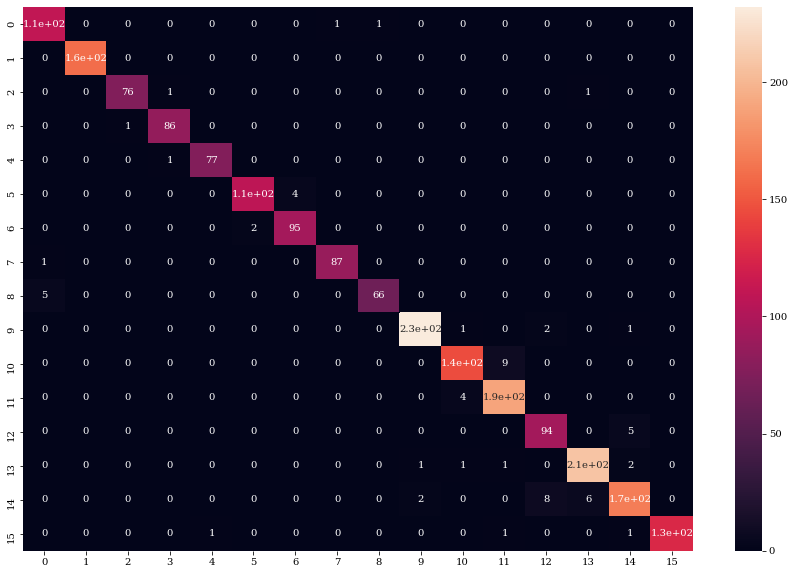

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=[15,10])
cf_matrix = confusion_matrix(y_test, np.array(torch.argmax(output, axis=1)), normalize=None)
sns.heatmap(cf_matrix, annot=True)


# Entrenamiento - Validación Cruzada

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_kfolds, X_test_kfolds, y_train_kfolds, y_test_kfolds = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
k=5

kf = KFold(n_splits=k)

lr_list = [1e-2, 1e-3, 1e-4]
bs_list = [16, 32, 64] 
wd_list = [1e-2, 1e-3, 1e-4]

param_grid = {'lr': lr_list, 'bs': bs_list, 'wd': wd_list}

best_score = 0
best_params = None

for param in list(ParameterGrid(param_grid)):
  gnn_model = architectures.SelectionGNN(dimNodeSignals=[2, 20, 20], nFilterTaps=[3,3], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[15, 15], poolingFunction=graphML.NoPool, poolingSize=[1, 1], dimLayersMLP=[16], GSO=torch.from_numpy(W).float())

  ACC = 0
  for train_index, val_index in kf.split(X_train_kfolds):
  #    print("TRAIN:", train_index, "val:", val_index)
    X_train_cv, X_val_cv = X_train_kfolds[train_index], X_train_kfolds[val_index]
    y_train_cv, y_val_cv = y_train_kfolds[train_index], y_train_kfolds[val_index]

    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_val_cv = scaler.transform(X_val_cv)

    x_training_data = np.reshape(X_train_cv,(X_train_cv.shape[0],2,15))
    x_val_data = np.reshape(X_val_cv,(X_val_cv.shape[0],2,15))
    y_training_data = np.reshape(y_train_cv,(y_train_cv.shape[0],1,y_train_cv.shape[1]))
    y_val_data = np.reshape(y_val_cv,(y_val_cv.shape[0],1,y_val_cv.shape[1]))


    train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
    val_data = torch.utils.data.TensorDataset(torch.from_numpy(x_val_data).float(), torch.from_numpy(y_val_data).float())

    (trained_gnn_model, train_loss_gnn, test_loss_gnn, y_pred) = train_model(gnn_model, train_data, val_data, n_epochs=50, epsilon=param['lr'], batch_size=param['bs'], weight_decay=param['wd'])

    m = torch.nn.Softmax(dim=1)
    output = m(y_pred)
    ACC += accuracy_score(y_val_cv, np.array(torch.argmax(output, axis=1)))/k

  if ACC > best_score:
      best_score = ACC
      best_params = param

  print("params: ", param)
  print("Accuracy: ", ACC) 
  print()

print("----------- BEST PARAMS --------------")
print("params: ", best_params)
print("Accuracy: ", best_score) 
print()

experiment.add_tag("corss-2_4-5")
experiment.log_parameters(best_params)
experiment.log_metrics({"accuracy": best_score})


params:  {'bs': 16, 'lr': 0.01, 'wd': 0.01}
Accuracy:  0.9102089552238807

params:  {'bs': 16, 'lr': 0.01, 'wd': 0.001}
Accuracy:  0.9447164179104478

params:  {'bs': 16, 'lr': 0.01, 'wd': 0.0001}
Accuracy:  0.9574925373134326

params:  {'bs': 16, 'lr': 0.001, 'wd': 0.01}
Accuracy:  0.9299104477611941

params:  {'bs': 16, 'lr': 0.001, 'wd': 0.001}
Accuracy:  0.9635820895522388

params:  {'bs': 16, 'lr': 0.001, 'wd': 0.0001}
Accuracy:  0.9771940298507462

params:  {'bs': 16, 'lr': 0.0001, 'wd': 0.01}
Accuracy:  0.9352835820895522

params:  {'bs': 16, 'lr': 0.0001, 'wd': 0.001}
Accuracy:  0.956776119402985

params:  {'bs': 16, 'lr': 0.0001, 'wd': 0.0001}
Accuracy:  0.9566567164179104

params:  {'bs': 32, 'lr': 0.01, 'wd': 0.01}
Accuracy:  0.9130746268656716

params:  {'bs': 32, 'lr': 0.01, 'wd': 0.001}
Accuracy:  0.9447164179104478

params:  {'bs': 32, 'lr': 0.01, 'wd': 0.0001}
Accuracy:  0.9650149253731343

params:  {'bs': 32, 'lr': 0.001, 'wd': 0.01}
Accuracy:  0.9320597014925374

para

In [ ]:
print(best_params)
print(best_score)

{'bs': 16, 'lr': 0.001, 'wd': 0.0001}
0.9771940298507462


In [ ]:
y_pred

In [ ]:
plot_losses('GNN model',train_loss_gnn, test_loss_gnn)

In [ ]:
y_train_cv

In [ ]:
 np.array(torch.argmax(y_pred, axis=1))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_val)
y_val

In [ ]:
print(accuracy_score(y_val, y_pred_knn))
print(classification_report(y_val, y_pred_knn))

0.9069212410501193
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        69
           1       0.99      1.00      0.99        73
           2       0.92      0.96      0.94        51
           3       0.98      1.00      0.99        54
           4       1.00      0.87      0.93        54
           5       0.91      0.98      0.94        60
           6       0.98      0.88      0.92        48
           7       0.98      0.98      0.98        45
           8       0.85      0.93      0.89        44
           9       0.89      0.95      0.92       134
          10       0.88      0.93      0.90        97
          11       0.88      0.85      0.87       107
          12       0.82      0.91      0.86        54
          13       0.89      0.83      0.86       152
          14       0.82      0.80      0.81       133
          15       1.00      0.99      0.99        82

    accuracy                           0.91      1257
   macr

# FCNN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier().fit(X_train, y_train)
y_pred_fcnn = clf.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(accuracy_score(y_val, y_pred_fcnn))
print(classification_report(y_val, y_pred_fcnn))

0.9284009546539379
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        69
           1       0.99      0.99      0.99        73
           2       0.98      0.96      0.97        51
           3       0.98      0.98      0.98        54
           4       0.98      0.94      0.96        54
           5       0.97      0.97      0.97        60
           6       0.96      0.96      0.96        48
           7       0.93      0.96      0.95        45
           8       0.97      0.86      0.92        44
           9       0.92      0.95      0.93       134
          10       0.89      0.95      0.92        97
          11       0.91      0.91      0.91       107
          12       0.85      0.93      0.88        54
          13       0.90      0.88      0.89       152
          14       0.89      0.83      0.86       133
          15       1.00      1.00      1.00        82

    accuracy                           0.93      1257
   macr